
# Bitcoin Rolling-max and Rolling-min Trade Algo


Let's import some packages that will be helpful for us:

In [4]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import datetime


In [5]:
def get_data(symbol, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
     # TODO: Read and join data for each symbol

    df_temp = pd.read_csv('data/{}.csv'.format(symbol), usecols=['Timestamp', 'Close'])
    df_temp['datetime'] = pd.to_datetime(df_temp['Timestamp'], unit='s')
    df_temp = df_temp.set_index('datetime')
    df_temp.drop(['Timestamp'], inplace = True, axis = 1)
    locs = df_temp.index.indexer_at_time('00:00:00')
    df_temp = df_temp.iloc[locs]
    df = df.join(df_temp, how='inner')
    df['Close'].fillna(method='ffill', inplace=True)
    return df

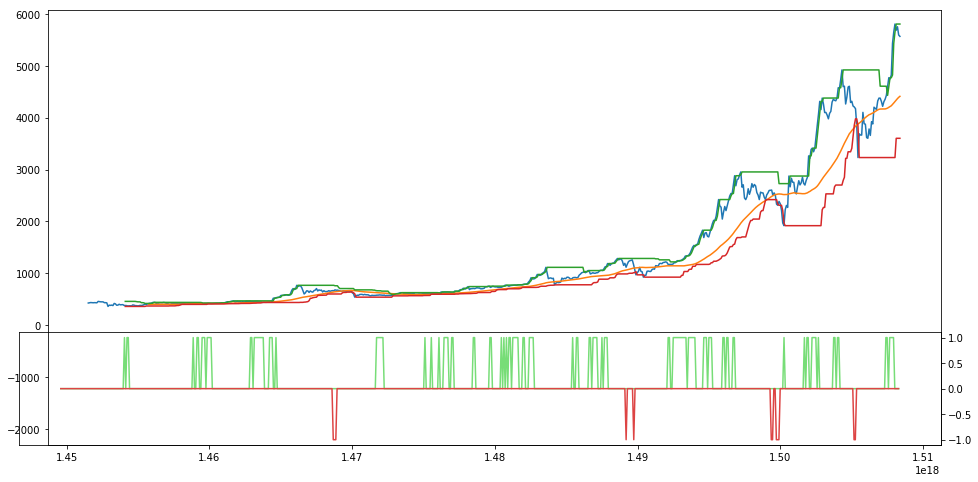

In [6]:
def rolling_mean(values, window):
    return values.rolling(window = window).mean()

def rolling_max(values, window):
    return values.rolling(window = window).std()


def test_run():
    dates = pd.date_range('2015-12-31', '2017-10-19')
    start_date='2011-12-31'
    end_date='2017-10-20'
    symbol = 'bitstampfull2'
    data = get_data(symbol, dates)

    data['RollingMean'] = rolling_mean(data['Close'], window = 50)
    data['RollingMax'] = data['Close'].shift(1).rolling(30, min_periods=30).max()
    data['RollingMin'] = data['Close'].shift(1).rolling(30, min_periods=30).min()
    data['Buy'] = np.zeros(len(data))
    data['Sell'] = np.zeros(len(data))
    data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
    data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

    fig,ax1 = plt.subplots(figsize=(16, 8))
    ax1.plot(data[['Close','RollingMean','RollingMax','RollingMin']])
    y = ax1.get_ylim()
    ax1.set_ylim(y[0] - (y[1]-y[0])*0.4, y[1])
    ax2 = ax1.twinx()
    ax2.set_position(matplotlib.transforms.Bbox([[0.1,0.125],[0.9,0.32]]))
    ax2.plot(data['Buy'], color='#77dd77')
    ax2.plot(data['Sell'], color='#dd4444')
    

    plt.show()


test_run()

## Preparing and visualing our dataset 

Now we can write a couple of functions to help find our dataset, read it in, and clean it, all for our date range.

Below we can call these functions to get an idea of what our series looks like at this point.

Next let's define a simple fcn so we can start visualizing our data.